
# Section 1: Job Shop Scheduling Problem 



## System Description (DFJSP)

The **Dynamic Flexible Job Shop Scheduling Problem (DFJSP)** schedules dynamically arriving jobs on multiple machines to minimize total tardiness.

- There are $n$ successively arriving jobs $J=\{J_1,\dots,J_n\}$ to be processed with $m$ machines $M=\{M_1,\dots,M_m\}$.

- Each job $J_i$ has $n_i$ ordered operations $ O_{i,1},\; O_{i,2},\; \dots,\; O_{i,n_i}$.
- Each operation $O_{i,j}$ can be processed on any compatible machine from its set $M_{i,j}\subseteq M$, with processing time $t_{i,j,k}$ on machine $M_k$.

- Each job has:
    - Arrival time $A_i$
    - Due date $D_i$
    - Operation completion time $C_{i,j}$

- To simplify the problem there are some constraints on the system.
    - **Capacity:** each machine processes at most one operation at a time.  
    - **Precedence:** operations of the same job follow the fixed order $O_{i,1}\!\to\! \cdots \!\to\! O_{i,n_i}$.  
    - **Non-preemption:** once started, an operation runs to completion.  
    - **No setups/transport:** setup and transfer times are neglected.

## State Representaion:

-  In previous RL-based scheduling methods, state feature was defind as a some indicatorus of the production status, i.e. number of machines/jobs/operations in shop floor, the remaining processing time of uncompleted jobs, the current workload/queue length of each machine and so on. However, the problem of this approach is that in real world the number of jobs/machine/operations are large and can vary in a wide range, and taking these indicators as state decrease the generalizability of the RL agent. Since it can only perform well under the same same state size.
- To seprate the state representaion from the the direct indicator mentiond earlier, we use seven elaborately state feature with each value in the range of [0, 1].

At each rescheduling point *t*, the environment state is represented by the following features:

1. **Average machine utilization:**  $U_{ave}(t) = \frac{\sum_{k=1}^{m} U_k(t)}{m}$

2. **Standard deviation of machine utilization:**  $U_{std}(t) = \sqrt{\frac{\sum_{k=1}^{m} (U_k(t) - U_{ave}(t))^2}{m}}$

3. **Average operation completion rate:**  $CRO_{ave}(t) = \frac{\sum_{i=1}^{n} OP_i(t)}{\sum_{i=1}^{n} n_i}$

4. **Average job completion rate:**  $CRJ_{ave}(t) = \frac{\sum_{i=1}^{n} CRJ_i(t)}{n}$

5. **Standard deviation of job completion rate:**  $CRJ_{std}(t) = \sqrt{\frac{\sum_{i=1}^{n} (CRJ_i(t) - CRJ_{ave}(t))^2}{n}}$

6. **Estimated tardiness rate:**  $Tard_{e}(t) = \frac{N_{tard}}{N_{left}}$

7. **Actual tardiness rate:**  $Tard_{a}(t) = \frac{\text{Number of actual tardy operations}}{\text{Number of uncompleted operations}}$


## Action Space:

Before going explaning action space for the RL agent we need to explain what are the decision that need to be taken for succesful and efficient job shop scheduling.
There are two main categories of decision that need to be taken, **sequencing** and **machine assignment (routing)**.

- Sequencing: Determines the order in which jobs are processed on each machine.
- Machine assignment: Determines which machine will execute a specific operation when multiple machines are capable of performing it.


Traditionaly some rules have been used for job shop scheduling problem, but no specific rule has found to perform well across all shop configuration. Here the goal of reinforcemnet learning agent is to select between six different comosite of sequencing and machine assignment rule. In this way the reinforcement learning can learn to dispatch each rules based on the status of the system. 

List of the rules: 
| **Rule** | **Description** | **Formula / Logic** |
|-----------|-----------------|----------------------|
| **LWKRSPT** | Least Work Remaining, tie-break by Shortest Processing Time | Lexicographic rule: minimize **LWKR**, then **PT** |
| **LWKRMOD** | Least Work Remaining, tie-break by Modified Operation Due Date | Lexicographic rule: minimize **LWKR**, then **MOD** |
| **PTWINQ** | Processing Time plus Work In Next Queue | **Priority = PT + WINQ** |
| **PTWINQS** | Processing Time plus Work In Next Queue plus Slack | **Priority = PT + WINQ + Slack** |
| **DPTLWKRS** | Double Processing Time plus Least Work Remaining plus Slack | **Priority = 2×PT + LWKR + Slack** |
| **DPTWINQNPT** | Double Processing Time plus Work In Next Queue plus Next Processing Time | **Priority = 2×PT + WINQ + NPT** |

### Rule 1: **LWKRSPT**

In [8]:
# This is a placeholder for the project code.

### Rule 2: **LWKRMOD**

In [9]:
# This is a placeholder for the project code.

### Rule 3: **PTWINQ**

In [10]:
# This is a placeholder for the project code.

### Rule 4: **PTWINQS**

In [11]:
# This is a placeholder for the project code.

### Rule 5: **DPTLWKRS**

In [12]:
# This is a placeholder for the project code.

### Rule 6: **DPTWINQNPT**

In [13]:
# This is a placeholder for the project code.

## Reward definition:

The goal of the reward function is to lower these values follwing the same priority order.
1. Lower **actual tardiness**
2. Lower **estimated tardiness**
3. Higher **machine utilization**


### **How It Works**

#### **1. Primary goal — Minimize actual tardiness**
- If the **actual tardiness rate (Tarda)** decreases → **reward = +1**  
- If it increases → **reward = –1**

#### **2. Secondary goal — Reduce estimated tardiness**
- If the actual tardiness remains unchanged, compare the **estimated tardiness rate (Tarde):**  
  - If Tarde decreases → **reward = +1**  
  - If Tarde increases → **reward = –1**

#### **3. Tertiary goal — Maintain high machine utilization**
- If tardiness values remain unchanged, check the **average machine utilization (Uave):**  
  - If Uave increases → **reward = +1**  
  - If Uave remains within 95% of its previous value → **reward = 0**  
  - Otherwise → **reward = –1**




# Section 2: Discrete Event Simulation:


- Discrete Event Simulation (DES) operates on the premise of modeling dynamic systems by tracking   individual events as they occur at distinct points in time. It’s a powerful technique employed to simulate and analyze systems where changes occur instantaneously, focusing on key events that drive system behavior.

## Fundamental Concepts of DES
At its core, DES revolves around entities, events, the simulation clock, and queues.

- **Entities** represent the objects or elements within the system under observation.
- **Events**, triggered by entities, denote occurrences that affect the system’s state or condition.
- **The simulation clock** marks discrete instances when these events transpire, driving the progression of time within the simulated environment.
- **Queues** play a pivotal role in managing and processing entities, representing waiting lines or buffers where entities await processing or service.

If we go one abstraction layer up, common DES components can be classified into sources, servers (with or withtout queues) and sinks.

- **Sources** are responsible of producing entities and inserting them into the simulating system. Times between arrival and amount of entities per arrival are common parameters of sources.
- **Servers** are in charge of delaying entities in the system for a given time period defined usually as a processing time.
- **Sinks** are used to remove entities from the simlating system and are useful to collect information about times spend by entities and performance of the overall system.

Events:

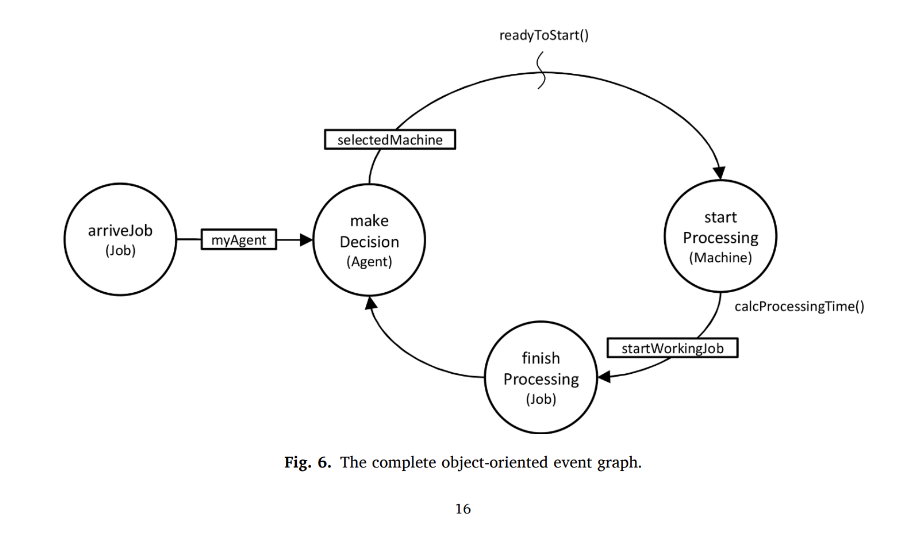

## Implementing Entities:

Jobs are the entities that go through the system, each job has different operation that need to be go through machines to be processed.
Since we are doing process-orineted simulation each job is a a process.

In [ ]:
class Operation:
    def __init__(self, op_id, compatible_machines, processing_times):
        self.id = op_id
        self.compatible_machines = compatible_machines    # e.g. [0, 3, 5]
        self.processing_times = processing_times          # e.g. {0: 5.0, 3: 4.2, 5: 6.1}

    def get_proc_time(self, machine_id):
        return self.processing_times[machine_id]
    

    def __repr__(self):
        pts = ", ".join(f"{m}:{p:.2f}" for m, p in self.processing_times.items())
        return f"Operation(id={self.id}, compat={self.compatible_machines}, pt={{{pts}}})"
    

# This class is for creating a job process.
class Job:
    def __init__(self, job_id, arrival_time, due_date, operations):
        self.id = job_id
        self.arrival_time = arrival_time
        self.due_date = due_date
        self.operations = operations
        self.current_op_index = 0

    def next_operation(self):
        if self.current_op_index < len(self.operations):
            return self.operations[self.current_op_index]
        return None

    def advance_operation(self, finish_time=None):
        self.current_op_index += 1
        # you can store finish_time later if you want
    
    def __repr__(self):
        return (f"Job(id={self.id}, arrival={self.arrival_time:.2f}, due={self.due_date:.2f}, "
                f"ops={len(self.operations)}, cur_idx={self.current_op_index})")   



## Implementing Servers:
The machines is our servers that has queue and process jobs.

In [15]:

import simpy
from typing import Optional, List


class Machine:
    """
    Machine (server) in the job shop.

    Responsibilities:
    - can process ONE job at a time (capacity = 1)
    - keeps a queue of jobs waiting for this machine
    - knows when it will be free (expected_time_to_idle)
    - tracks busy time → utilization
    """

    def __init__(self, env: simpy.Environment, machine_id: int):
        self.env = env
        self.id = machine_id

        # simpy resource = the actual "server"
        self.resource = simpy.Resource(env, capacity=1)

        # logical state
        self.state: str = "IDLE"          # or "PROCESSING"
        self.current_job = None           # job being processed now
        self.queue: List = []             # jobs assigned here but not started

        # metrics
        self.expected_time_to_idle: float = 0.0
        self.total_busy_time: float = 0.0  # accumulated processing time

    @property
    def utilization(self) -> float:
        """Busy time / time passed."""
        if self.env.now == 0:
            return 0.0
        return self.total_busy_time / self.env.now

    def ready_to_start(self) -> bool:
        """True if machine is idle and has something in its queue."""
        return self.state == "IDLE" and len(self.queue) > 0

## Implement the Agent (RL agent)







In [22]:
from typing import Iterable, Optional

DEFAULT_RULES = (
    "FIFO",
    "LIFO",
    "SPT",   # Shortest Processing Time
    "LPT",   # Longest Processing Time
    "EDD",   # Earliest Due Date
    "CR",    # Critical Ratio
)

class PredefinedRuleAgent:
    """
    Agent that always returns a specific dispatching rule.
    You can change the rule at runtime via set_rule().
    """
    def __init__(self, rule: str, allowed_rules: Optional[Iterable[str]] = None):
        self.allowed_rules = tuple(allowed_rules or DEFAULT_RULES)
        if rule not in self.allowed_rules:
            raise ValueError(f"rule must be one of {self.allowed_rules}, got: {rule}")
        self.rule = rule

    def select_rule(self, state=None) -> str:
        return self.rule

    def set_rule(self, new_rule: str) -> None:
        if new_rule not in self.allowed_rules:
            raise ValueError(f"rule must be one of {self.allowed_rules}, got: {new_rule}")
        self.rule = new_rule

## Implementing the Model
Here we implement the model of our jobshop, where it knows how many maachine it has and what is the state of each machine.

In [ ]:
import simpy

# JobShop class that manages the job shop environment (This is our scheduler).
# It handles job arrivals, decisions on job dispatching,

# 
class JobShop:
    """
    JobShop
    -------
    - holds machines
    - holds jobs currently in the system
    - keeps the list of eligible jobs (ready for dispatch)
    - contains ALL event processes: decision, start, finish
    """
    def __init__(self, env: simpy.Environment, machines, agent):
        self.env = env
        self.machines = machines
        self.agent = agent

        self.numberOfMachines = len(machines)
        self.jobsInTheShop = []    # all not-yet-completed jobs
        self.eligibleJobs = []     # jobs whose current op is ready
        self.totalJobs = 0

        # to avoid multiple decisions at same time
        self._decision_scheduled = False

    
    # Event 1: Jobs arrive -- triggers make a decision
    def add_job(self, job):
        """JobArrivalEvent"""
        self.jobsInTheShop.append(job)
        self.eligibleJobs.append(job)
        self.totalJobs += 1
        # every arrival => we want a decision
        self.schedule_decision()

    # Event 2: Make a decision defined as process here to solve the simultaneity problem
    def schedule_decision(self):
        if not self._decision_scheduled:
            self._decision_scheduled = True
            self.env.process(self._decision_event())

    def _decision_event(self):
        """MakeDecisionEvent (paper)"""
        # let other events at this same time run first(like finish processing)
        yield self.env.timeout(0)
        self._decision_scheduled = False

        if not self.eligibleJobs:
            return

        # ask agent which rule to use
        rule_name = self.agent.select_rule()
        self._apply_rule(rule_name)

    def _apply_rule(self, rule_name: str):
        # pick a job according to the rule
        job = self._select_job_by_rule(rule_name)
        if job is None:
            return

        op = job.next_operation()
        # pick a machine for that operation
        machine = self._select_machine_for_operation(op)
        if machine is None:
            # no machine can take it → leave job eligible
            return

        # assign
        self.eligibleJobs.remove(job)
        machine.queue.append(job)

        # if machine is idle, start immediately
        if machine.ready_to_start():
            self.env.process(self._start_processing_proc(machine))

    def _select_job_by_rule(self, rule_name: str):
        if not self.eligibleJobs:
            return None

        if rule_name == "FIFO":
            # earliest arrival time
            return sorted(self.eligibleJobs, key=lambda j: j.arrival_time)[0]

        if rule_name == "EDD":
            # earliest due date
            return sorted(self.eligibleJobs, key=lambda j: j.due_date)[0]

        if rule_name == "SPT":
            # shortest processing time for CURRENT op on ANY compatible machine
            def est_pt(job):
                op = job.next_operation()
                # find min PT among compatible machines that exist
                pts = [
                    op.processing_times[m.id]
                    for m in self.machines
                    if m.id in op.compatible_machines
                ]
                return min(pts)
            return sorted(self.eligibleJobs, key=est_pt)[0]

        # fallback
        return self.eligibleJobs[0]

    def _select_machine_for_operation(self, op):
        # list of machines that can do this op
        candidates = [m for m in self.machines if m.id in op.compatible_machines]
        if not candidates:
            return None
        # prefer idle
        idle = [m for m in candidates if m.state == "IDLE"]
        if idle:
            return idle[0]
        # otherwise the one that becomes free first
        return sorted(candidates, key=lambda m: m.expected_time_to_idle)[0]

    # Event 3: Start processing
    def _start_processing_proc(self, machine):
        """StartProcessingEvent (paper)"""
        # pull next job from this machine’s queue
        job = machine.queue.pop(0)
        op = job.next_operation()
        ptime = op.get_proc_time(machine.id)

        # request the simpy resource
        with machine.resource.request() as req:
            yield req

            # start
            machine.state = "PROCESSING"
            machine.current_job = job
            start_time = self.env.now
            finish_time = self.env.now + ptime
            machine.expected_time_to_idle = finish_time
            print(f"[{self.env.now:5.1f}] M{machine.id} START J{job.id} op{op.id} for {ptime}")

            # processing delay
            yield self.env.timeout(ptime)

            # done → call finish
            self._finish_processing(machine, job, start_time, finish_time)

    # Event 4: Finish processing -- triggers make a decision
    def _finish_processing(self, machine, job, start_time, finish_time):
        """FinishProcessingEvent (paper)"""
        print(f"[{self.env.now:5.1f}] M{machine.id} FINISH J{job.id}")

        # update machine stats
        machine.total_busy_time += (finish_time - start_time)
        machine.current_job = None

        # update job
        job.advance_operation(finish_time)

        # if job still has work, make it eligible again
        if job.next_operation() is not None:
            self.eligibleJobs.append(job)
        else:
            # job is completed → remove from system
            if job in self.jobsInTheShop:
                self.jobsInTheShop.remove(job)
            print(f"[{self.env.now:5.1f}] J{job.id} COMPLETED")

        # machine: if more jobs waiting, start next; else go idle
        if machine.queue:
            # start next job on same machine
            self.env.process(self._start_processing_proc(machine))
        else:
            machine.state = "IDLE"
            machine.expected_time_to_idle = self.env.now

        # every finish → new decision
        self.schedule_decision()


In [ ]:
import simpy
import random

# JobSource class to generate jobs
class JobSource:
    """
    JobSource class
    ----------------
    SimPy-based component that generates jobs for the discrete event simulation.

    **Inputs:**
    - env: SimPy environment object controlling simulation time and events.
    - shop: JobShop instance where generated jobs are added.
    - machine_ids: list of available machine IDs in the shop.
    - n_initial: number of jobs to create at simulation start (time = 0).
    - n_dynamic: number of additional jobs to generate during simulation.
    - mean_interarrival: average time interval (exponential distribution) between dynamic job arrivals.
    - nops_range: tuple (min, max) defining possible number of operations per job.
    - compat_range: tuple (min, max) defining how many machines can perform each operation.
    - pt_range: tuple (min, max) defining processing time range for each operation.
    - ddt: due date tightness factor for job due date calculation.
    - start_job_id: ID number to assign to the first job.
    - seed: random seed for reproducibility.

    **Outputs:**
    - Creates Job instances (each containing its own operations, machine compatibility, and due date)
    and inserts them into the JobShop.
    - Generates two event streams:
        1. Initial job arrivals at time 0.
        2. Dynamic job arrivals following an exponential interarrival distribution.
    """

    def __init__(self,
                 env: simpy.Environment,
                 shop,
                 machine_ids,
                 n_initial=20,
                 n_dynamic=50,
                 mean_interarrival=100.0,
                 nops_range=(2, 5),
                 compat_range=(1, 3),
                 pt_range=(2.0, 10.0),
                 ddt=1.0,
                 start_job_id=1,
                 seed=42):
        
        self.env = env
        self.shop = shop
        self.machine_ids = list(machine_ids)
        self.n_initial = n_initial
        self.n_dynamic = n_dynamic
        self.mean_interarrival = mean_interarrival
        self.nops_range = nops_range
        self.compat_range = compat_range
        self.pt_range = pt_range
        self.ddt = ddt
        self.next_job_id = start_job_id
        self.rng = random.Random(seed)

        # create initial jobs now
        self._create_initial_jobs()

        # start dynamic arrivals
        # The dynamics job arrivals is treated as process here
        self.env.process(self._dynamic_arrivals())

    # function to create a single job ✓
    def _make_job(self, job_id: int, now: float):
        # how many operations?
        n_ops = self.rng.randint(self.nops_range[0], self.nops_range[1])

        operations = []
        total_avg_pt = 0.0
        for op_id in range(n_ops):
            # how many machines can do this op?
            k = self.rng.randint(self.compat_range[0],
                                 min(self.compat_range[1], len(self.machine_ids)))
            compat = self.rng.sample(self.machine_ids, k=k)

            # processing times per compatible machine
            pt_low, pt_high = self.pt_range
            pt_dict = {}
            for m in compat:
                pt = self.rng.uniform(pt_low, pt_high)
                pt_dict[m] = pt
            avg_pt = sum(pt_dict.values()) / len(pt_dict)
            total_avg_pt += avg_pt

            op = Operation(op_id, compat, pt_dict)
            operations.append(op)

            # NOTE: Operation & Job come from your other file

        due_date = now + self.ddt * total_avg_pt
        return Job(job_id, arrival_time=now, due_date=due_date, operations=operations)

    # Create the initial jobs at time t = 0 and add them to the shop ✓
    def _create_initial_jobs(self):
        for _ in range(self.n_initial):
            job = self._make_job(self.next_job_id, now=0.0)
            self.shop.add_job(job)
            self.next_job_id += 1

    # create dynamic arrivals during the simulation with exponential interarrival times ✓
    def _dynamic_arrivals(self):
        for _ in range(self.n_dynamic):
            # define the gap for the next arrival
            gap = self.rng.expovariate(1.0 / self.mean_interarrival)
            # Suspend this prcocess for 'gap' time units
            yield self.env.timeout(gap)
            # Create the jobs and add to shop when the time comes
            job = self._make_job(self.next_job_id, now=self.env.now)
            self.shop.add_job(job)
            self.next_job_id += 1



# Section 3: Testing the Simulation


## Production Configuration:

- Based on the ref 1 the production configuration is defined based on the value shown in the table below:

    ![Parameter settings of different production configurations.](./figures/image1.png)
- The production configuration used for training the RL is defined as:

    ![Production configuration for the training.png](./figures/image2.png)

In [46]:
# ----------------- Production Configuration -----------------
NOM = 3 # {10, 20, 30, 40, 50} Number of Machines
NIJ = 3 # Initial Number of Jobs
TNIJ = 3 # {50, 100, 200} Number of Arrival Jobs
SIM_t = 1000 # Total Simulation Time
DDT = 0.5 # {0.5, 1.0, 1.5} Due Date Tightness
NAMFEO = (1, NOM) # Number of Available Machines for Each Operation
NOBJ = (1, 50)  # Number of Operations per Job
PTOM = (1, 50) # processing time range for each operation on each machine
EXP_BJ = 100 # {50, 100, 200} average exponential distribution between two successive job arrivals

In [60]:
import simpy
env = simpy.Environment()
machines = [Machine(env, m_id) for m_id in range(NOM)]
CHOSEN_RULE = "FIFO"  # Change to desired rule: FIFO, LIFO, SPT, LPT, EDD, CR
agent = PredefinedRuleAgent(rule=CHOSEN_RULE)

shop = JobShop(env=env, machines=machines, agent=agent)

# Your JobSource signature matches these keyword args
source = JobSource(
    env=env,
    shop=shop,
    machine_ids=list(range(NOM)),
    n_initial=NIJ,
    n_dynamic=TNIJ,
    mean_interarrival=EXP_BJ,
    nops_range=NOBJ,        # sanitized from NOBJ
    compat_range=NAMFEO,    # sanitized from NAMFEO
    pt_range=PTOM,          # sanitized from PTOM
    ddt=DDT,
    start_job_id=1,
    seed=123
)


Lets check the initial jobs.

In [61]:
print(f" Number of jobs in the shop: {len(shop.jobsInTheShop)}")

for job in shop.jobsInTheShop:
    print(repr(job))
    for op in job.operations:
        print("   ", repr(op))


 Number of jobs in the shop: 3
Job(id=1, arrival=0.00, due=47.86, ops=4, cur_idx=0)
    Operation(id=0, compat=[0, 1], pt={0:14.06, 1:42.09})
    Operation(id=1, compat=[1], pt={1:27.27})
    Operation(id=2, compat=[1, 0], pt={1:8.82, 0:17.52})
    Operation(id=3, compat=[2, 0], pt={2:9.03, 0:45.39})
Job(id=2, arrival=0.00, due=624.04, ops=50, cur_idx=0)
    Operation(id=0, compat=[2], pt={2:19.50})
    Operation(id=1, compat=[1], pt={1:36.87})
    Operation(id=2, compat=[0], pt={0:5.55})
    Operation(id=3, compat=[0], pt={0:39.71})
    Operation(id=4, compat=[1], pt={1:45.65})
    Operation(id=5, compat=[1, 2, 0], pt={1:42.05, 2:38.67, 0:17.83})
    Operation(id=6, compat=[0, 1], pt={0:1.61, 1:44.75})
    Operation(id=7, compat=[2, 1, 0], pt={2:26.51, 1:21.56, 0:25.99})
    Operation(id=8, compat=[0, 2, 1], pt={0:33.25, 2:9.34, 1:17.51})
    Operation(id=9, compat=[0, 1], pt={0:20.00, 1:39.16})
    Operation(id=10, compat=[0], pt={0:29.72})
    Operation(id=11, compat=[1, 0, 2], pt={

In [44]:
print("▶️ Running...")
env.run(until=SIM_t) # Run the simulation until SIM_time units
print("✅ Done.")

▶️ Running...
[  0.0] M0 START J1 op0 for 14.061136814037795
[  6.5] M2 START J2 op0 for 19.502144071638366
[ 14.1] M0 FINISH J1
[ 14.1] M0 START J3 op0 for 1.9756989626428383
[ 16.0] M0 FINISH J3
[ 16.0] M1 START J1 op1 for 27.27389996166242
[ 26.0] M2 FINISH J2
[ 26.0] M0 START J3 op1 for 24.045090093527563
[ 43.3] M1 FINISH J1
[ 43.3] M1 START J2 op1 for 36.86992343491139
[ 50.0] M0 FINISH J3
[ 50.0] M0 START J1 op2 for 17.5236161983545
[ 67.5] M0 FINISH J1
[ 67.5] M0 START J3 op2 for 2.575535280308941
[ 70.1] M0 FINISH J3
[ 70.1] M0 START J1 op3 for 45.38937258256609
[ 75.2] M2 START J3 op3 for 16.71054493458846
[ 80.2] M1 FINISH J2
[ 91.9] M2 FINISH J3
[ 91.9] J3 COMPLETED
[ 91.9] M1 START J4 op0 for 3.1269114892621968
[ 95.0] M1 FINISH J4
[ 95.0] M1 START J4 op1 for 34.01472290660222
[115.5] M0 FINISH J1
[115.5] J1 COMPLETED
[115.5] M0 START J2 op2 for 5.545463507546259
[121.0] M0 FINISH J2
[121.0] M0 START J5 op0 for 36.82982185708609
[129.0] M1 FINISH J4
[157.9] M0 FINISH J5
[1

## Implementing the Source
-  In our project we have job generator that creats our entities, as mentioned it should create some initial jobs at time zero and the dynamically create jobs that arrive later in the simulation with randome arriaval time. 


# Learning Materials


https://www.youtube.com/watch?v=8SLk_uRRcgc

https://www.youtube.com/watch?v=NypbxgytScM


- great weblog for discrete event simulation explination:
https://medium.com/@vitostamatti1995/introduction-to-discrete-event-simulation-with-python-3b0cce67f92e

# References:
For developement of this code three main references was used.
- Reference 1: Dynamic scheduling for flexible job shop with new job insertions by
deep reinforcement learning. Shu Luo 2020 
- Reference 2: A discrete event simulator to implement deep reinforcement
learning for the dynamic flexible job shop scheduling problem
- Reference 3: Deep reinforcement learning for dynamic
scheduling of a flexible job shop.

https://github.com/RK0731/Deep-reinforcement-learning-for-dynamic-scheduling-of-a-flexible-job-shop


Q: For training the RL do we need to generate one shop configuration or different shop configuration: From the reference 1 we can see that when training the RL agent they use single production configuration as described in section 6.1, and since they are using non dimensional state representation their method is generalizable to other production configuration as shown in their result section. So in short, we do not need to change the production configuration in the 10 episode (~8000 training steps).



SimPy is a discrete-event simulation library. The behavior of active components (like vehicles, customers or messages) is modeled with processes. All processes live in an environment. They interact with the environment and with each other via events.